In [4]:
%pip install python-dotenv


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from dotenv import load_dotenv
import os
load_dotenv()

resource_name = os.getenv('RESOURCE_NAME')
api_version = os.getenv('API_VERSION')
key = os.getenv('AZURE_OPENAI_KEY')
deployment_name = os.getenv('DEPLOYMENT_NAME')

print(resource_name)
print(api_version)
print(key)
print(deployment_name)

dibranaigpt4vision
2023-12-01-preview
2e8e5f89896645f9b2c0d0e143a92a1d
gptvision




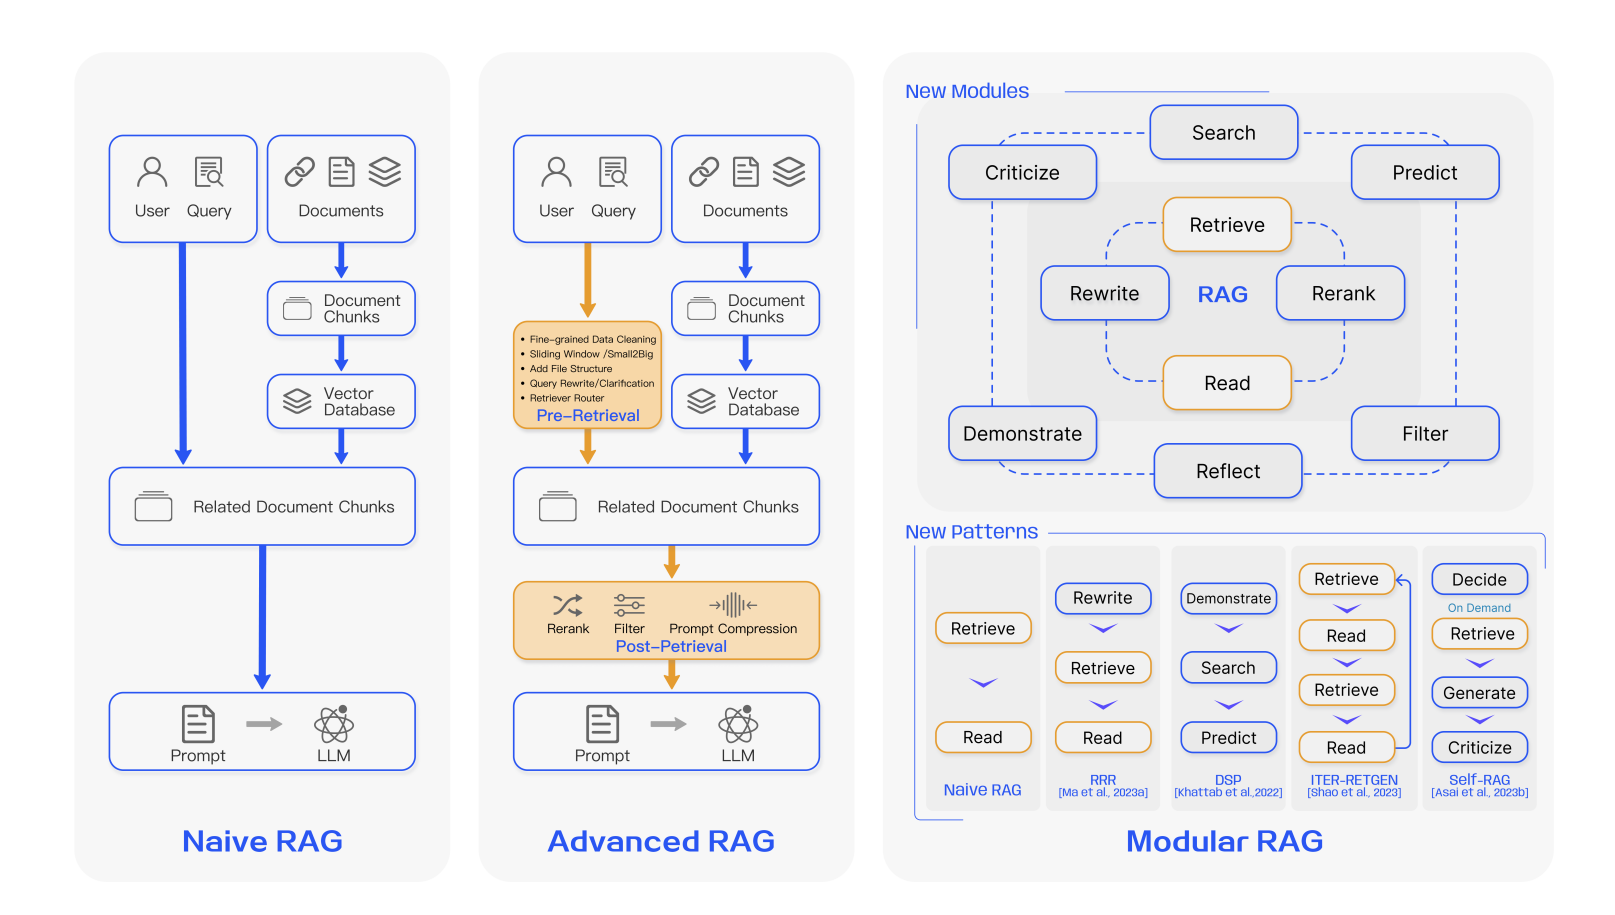

In [19]:
import base64
import requests

# Replace the URL with the actual image URL you want to encode
image_url = "https://github.com/DibranMulder/AI-research/blob/main/images/Ragmodules.png?raw=true"

# Download the image
response = requests.get(image_url)
image_data = response.content

# Encode the image data in base64
encoded_image = base64.b64encode(image_data).decode()

data_url = f"data:image/jpeg;base64,{encoded_image}"
print(data_url)

In [21]:
import requests

url = f"https://{resource_name}.openai.azure.com/openai/deployments/{deployment_name}/chat/completions?api-version={api_version}"
headers = {
    "Content-Type": "application/json",
    "api-key": key
}
data = {
    "max_tokens": 1000,
    "messages": [
        { "role": "system", "content": "You are a helpful assistant." },
        {
            "role": "user", 
            "content": [
	            {
	                "type": "text",
	                "text": "Describe this picture:"
	            },
	            {
	                "type": "image_url",
	                "image_url": {
                        "url": data_url
                    }
                } 
           ] 
        }
    ]
}

response = requests.post(url, headers=headers, json=data)
res = response.json()
#print(res)
print(res["choices"][0]["message"]["content"])

This image appears to be a structured representation of different components in sophisticated information retrieval or question-answering systems, showcasing various models or methods under a common theme of retriever-augmented generation (RAG). 

There are three main sections:

1. **Naive RAG**: 
   - Top-Left corner shows a simple flow from a user's query leading to document chunk retrieval and then to a language model (LLM) after selecting related document chunks.
   
2. **Advanced RAG**: 
   - Top-right shows an advanced version of the Naive RAG with additional pre-retieval steps like fine-grained data cleaning, query rewriting, and clarification. It also demonstrates steps for post-retrieval such as reranking, filtering, and prompt compression before feeding information to the language model.
   
3. **Modular RAG**: 
   - Bottom-right highlights new modules like Criticize, Retrieve, Read, and Demonstrate with interlinked patterns that include feedback loops and modular approaches 